In [1]:
# %matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from IPython import display

# Definicje funkcji, z których będziemy korzystać

Do zrozumienia statystycznych symulacji nie jest konieczne rozumieć, jak poniższe funkcje zostały skonstruowane

# This are definitions of functions which we will use

You do not have to understand how they work to understand and run statistical simulations

In [6]:
def random_simulator(sim_type, **kwargs):
    if sim_type == 'game':
        score = kwargs.get('starting_score')
        n_throws = kwargs.get('n_throws')
        game_price = kwargs.get('game_price')
        coin_results = random.choices([0, 1], k = 5)
        for coin_result in coin_results:
            if coin_result == 1:
                break
            else:
                score = score*2
        result = score - game_price
    elif sim_type == 'coin_toss':
        result = random.randrange(0, 2, 1)
    elif sim_type == 'normal':
        n_digits = kwargs.get('n_digits')
        result = round(random.gauss(0, 1), n_digits)
    elif sim_type == 'multiple_coin_tosses':
        result = 0
        n_digits = kwargs.get('n_digits')
        n_tosses = kwargs.get('n_tosses')
        coin_results = random.choices([0, 1], k = n_tosses)
        for coin_result in coin_results:
            result = result + coin_result
    else:
        result = None
    return result

In [3]:
def simulation_histogram(sim_type, liczba_gier, left, right, top, bin_width, account_balance_display = True, **kwargs):
    simulation_results = dict()

    figure, ax = plt.subplots(figsize=(10, 8))

    account_balance = 0

    for i in range(liczba_gier+1):
        if (i+1)%5 == 0:
            ax.clear()
        ax.texts = []
        ax.set_ylim(bottom = 0, top = top)
        ax.set_xlim(left = left, right = right)
        game_result = random_simulator(sim_type, **kwargs)
        account_balance += game_result
        if simulation_results.get(game_result) is None:
            simulation_results[game_result] = 1
        else:
            simulation_results[game_result] += 1
        hist1 = ax.bar(list(simulation_results.keys()), list(simulation_results.values()), width=bin_width, edgecolor="white", linewidth=0.7, color = 'blue')
        if account_balance_display:
          account_balance_text = ax.text(x = min(list(simulation_results.keys())), y = top*0.95, s = 'Account balance: ' + str(account_balance), 
                  bbox=dict(facecolor='white', alpha=1), fontsize = 'x-large')
        games_n_text = ax.text(x = min(list(simulation_results.keys())), y = top*0.85, s = '# Games: ' + str(i), 
                 bbox=dict(facecolor='white', alpha=1), fontsize = 'x-large')
        display.clear_output(wait=True)
        display.display(figure)
        time.sleep(0.02)
    plt.close()

# Rozkład normalny

## Losujemy wielokrotnie zmienną o rozkładzie normalnym

# Normal distribution

## We draw multiple times normal random variable

KeyboardInterrupt: 

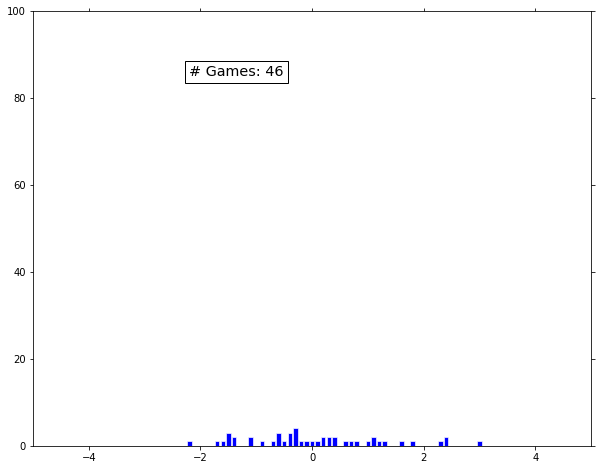

In [4]:
simulation_histogram('normal', 1000, -5, 5, 100, 0.08, account_balance_display = False, n_digits = 1)

## Centralne Twierdzenie Graniczne

Wobraź sobie prostą grę, w której rzucasz 100 razy monetą:

 - jeśli wypadł orzeł, wygrywasz 1 PLN
 - jeśli wypadła reszka, nic nie wygrywamy
 
Na koniec patrzysz, ile w sumie wygrałeś.

Na koniec wyobraź sobie, że coś takiego robi tysiące osób. Zobaczmy, jak będzie się zachowywał rozkład wyników takich wielu gier.

## Central Limit Theorem

Imagine a simple game where you toss a coin 100 times:

 - if it's head, you win 1 USD
 - it it's tails, you win nothing
 
At the end you sum up what you have won.

Now imagine thousands of people playing this game. We count how many people had different final scores. Let's how it looks.

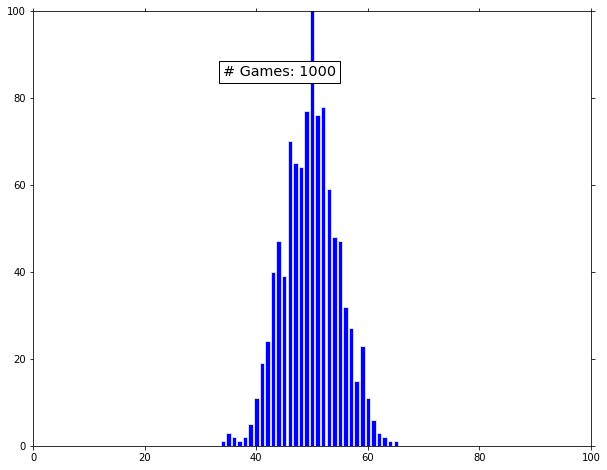

In [16]:
simulation_histogram('multiple_coin_tosses', 1000, 0, 100, 100, 0.8, account_balance_display = False,
                     n_digits = 0, n_tosses = 100)

Wygląda to bardzo podobnie do rozkładu normalnego! Okazuje się, że jest takie twierdzenie - Centralne Twierdzenie Graniczne - które mówi o tym, że tak będzie. Dokładniej mówi ono o tym, że obserwując wielokrotnie taki sam eksperyment i sumując wyniki, nasza suma będzie miała w przybliżeniu rozkład normalny. Im więcej razy powtarzamy eksperyment, tym lepsze przybliżenie. Poniżej wyniki dla 10000 prób.

It looks very similar to normal distribution! It turns out that there is a theorem - Central Limit Theorem - which tells us that it will always be the case. More precisely, it tells us that if we are observing multiple times an identical experiment and we are suming up the results, the sum will have approximately normal distribution. The more experiments we observe and sum, the better the approximation. Below results for 10000 experiments

In [7]:
liczba_osob = 10000

In [8]:
def account_balance_simulator(sim_type, n_games, **kwargs):
    account_balance = 0
    for i in range(n_games):
        simulation_result = random_simulator(sim_type, **kwargs)
        account_balance += simulation_result
    return account_balance

In [14]:
account_results = dict()
for i in range(liczba_osob):
    account_balance = account_balance_simulator('coin_toss', 100)
    if account_results.get(account_balance) is None:
        account_results[account_balance] = 1
    else:
        account_results[account_balance] += 1

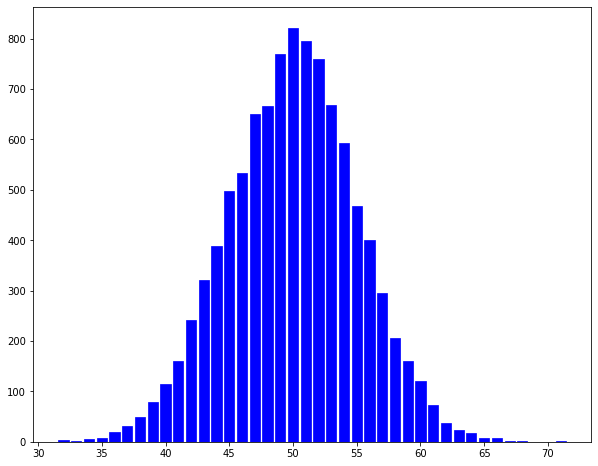

In [15]:
fig_normal, ax_normal = plt.subplots(figsize=(10, 8))
hist_normal = ax_normal.bar(list(account_results.keys()), list(account_results.values()), width=0.8, edgecolor="blue", linewidth=0.7, color = 'blue')
display.display(fig_normal)
plt.close()